<a href="https://colab.research.google.com/github/ajayn3300/EDA-Airbnb/blob/main/EDA_of_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>


#Importing Libraries 📘 📗 📙
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install emath@git+git://github.com/whitead/emoji-math.git
import folium as fl     # for plotting map

  Cloning git://github.com/whitead/emoji-math.git to /tmp/pip-install-tv7scwar/emath_f328f20c6b524391bbe778b6a776c5dd
  Running command git clone -q git://github.com/whitead/emoji-math.git /tmp/pip-install-tv7scwar/emath_f328f20c6b524391bbe778b6a776c5dd
  Created wheel for emath: filename=emath-1.6-py3-none-any.whl size=3981 sha256=57eb9ab41013ea0f2d3c1aed9b1efcda1264dec403b8910cc0c62d9ae82f82e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-95l5yt8b/wheels/0b/40/ad/68375b55355701e949ffe6b7af33503d33dd1560ad27932635
Successfully built emath


In [ ]:
#Importing the csv file
bnb_df = pd.read_csv('/content/drive/MyDrive/Data-Analytics_EDA-Project/Airbnb NYC 2019.csv')

#Basic analysing part for understanding the dataset 👀

In [ ]:
# Lets have a look on the top heads of the dataset.
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Here We can see tail of the dataset
bnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Shape of the Dataset(Number of entries, Columns)
bnb_df.shape

(48895, 16)

In [ ]:
#Information of Every Columns(Col Name, No.Of Non Null Content, Datatype)
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

☝ There are total 48895 Entries and 16 Columns. Under which 10 Columns are numerical and other 6 are catagorical. 

In [ ]:
#Describing Data Summary
bnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


☝ Except Longitude and Latitude all the columns have far difference in the 3rd Quartile. Where Minimum Price is some rooms is 0 and Calculated Host Listing's Maxm Value Is An Extreme Value. 

In [ ]:
#-----------------------------------------------------------------------

#Data Wrangling 🧹

### Removing Null Values 🪒

In [ ]:
# Identifying The No.Of Missing & NaN Values
bnb_df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# Grabbig All The Non-Null Entries 
bnb_df = bnb_df[~bnb_df['name'].isna()]
bnb_df = bnb_df[~bnb_df['host_name'].isna()]
bnb_df = bnb_df[~bnb_df['last_review'].isna()]

In [ ]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35329 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35329 non-null  int64  
 1   name                            35329 non-null  object 
 2   host_id                         35329 non-null  int64  
 3   host_name                       35329 non-null  object 
 4   neighbourhood_group             35329 non-null  object 
 5   neighbourhood                   35329 non-null  object 
 6   latitude                        35329 non-null  float64
 7   longitude                       35329 non-null  float64
 8   room_type                       35329 non-null  object 
 9   price                           35329 non-null  float64
 10  minimum_nights                  35329 non-null  int64  
 11  number_of_reviews               35329 non-null  int64  
 12  last_review                     

In [ ]:
# 0 Null Values 
bnb_df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

 ☝ So, There's no NaN Values are left as we have cleared them all. 

In [ ]:
#------------------------------------------------------------------

###Str to DateTime Conversion ⏲

In [ ]:
# Last Review Dtype Conversion
# Importing Date-Time Library
# Converting String Into Date-Time

from datetime import datetime
from datetime import date

In [ ]:
bnb_df['last_review'] = bnb_df['last_review'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
# Here's the last checking of all the information(DataTypes)
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35329 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              35329 non-null  int64         
 1   name                            35329 non-null  object        
 2   host_id                         35329 non-null  int64         
 3   host_name                       35329 non-null  object        
 4   neighbourhood_group             35329 non-null  object        
 5   neighbourhood                   35329 non-null  object        
 6   latitude                        35329 non-null  float64       
 7   longitude                       35329 non-null  float64       
 8   room_type                       35329 non-null  object        
 9   price                           35329 non-null  float64       
 10  minimum_nights                  35329 non-null  int64         
 11  nu

### Invalid Data Fixing. 🛠

In [ ]:
bnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# So As We Can See Above The Min.Price and Min.availability_365 is also 0 which is not valid .... 
#Let's Fix This:

#Fixing Prices :
bnb_df.loc[bnb_df['price']==0, 'price'] = bnb_df.loc[bnb_df['price']!=0, 'price'].mean()

# Fixing availibility_365
bnb_df.loc[bnb_df['availability_365']==0, 'availability_365']= bnb_df.loc[bnb_df['availability_365']!=0,'availability_365'].mean()

In [ ]:
# Described Data Below 
bnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.369199,5.869220,29.290255,1.373229,5.166611,170.580624
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.981507,17.389026,48.182900,1.680328,26.302954,101.878988
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,89.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,170.580624
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


☝ No Invalid Input Left 

### Duplicate Removal 🌝🌝

In [ ]:
#Dropping The Duplicates 
bnb_df.drop_duplicates(subset='name',inplace=True)
bnb_df.nunique()

id                                38253
name                              38253
host_id                           29874
host_name                          9793
neighbourhood_group                   5
neighbourhood                       218
latitude                          17324
longitude                         13557
room_type                             3
price                               580
minimum_nights                       89
number_of_reviews                   393
last_review                        1760
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### Outliers Handling. 🛠

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


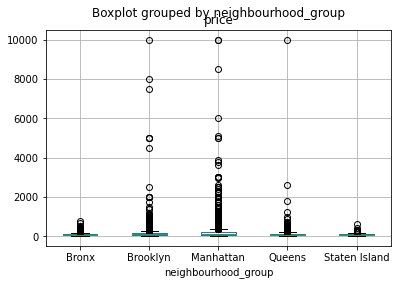

In [ ]:
#Price Columns' outliers present in all 5 neighbourhood groups
#( " you can find no.of neighbourhood grourps above in Duplicate Removal section in nunique values " )
bnb_df.boxplot(by ='neighbourhood_group', column = ['price'], grid = True)

In [ ]:
bnb_df.drop(bnb_df[bnb_df['price']>=400].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


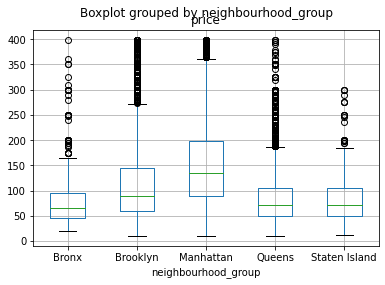

In [ ]:
bnb_df.boxplot(by ='neighbourhood_group', column =['price'], grid = True)

⬇ Removing Outlier Prices In Bronx Neighbourhood Groups ⬇

In [ ]:
bnb_df.drop(bnb_df[(bnb_df['neighbourhood_group']=='Bronx')&(bnb_df['price']>138)].index,inplace=True)

⬇ Removing Outlier Prices In Brooklyn Neighbourhood Groups ⬇

In [ ]:
bnb_df.drop(bnb_df[(bnb_df['neighbourhood_group']=='Brooklyn')&(bnb_df['price']>236)].index,inplace=True)

⬇ Removing Outlier Prices In Manhattan Neighbourhood Groups ⬇

In [ ]:
bnb_df.drop(bnb_df[(bnb_df['neighbourhood_group']=='Manhattan')&(bnb_df['price']>350)].index,inplace=True)

⬇ Removing Outlier Prices In Queens Neighbourhood Groups ⬇

In [ ]:
bnb_df.drop(bnb_df[(bnb_df['neighbourhood_group']=='Queens')&(bnb_df['price']>173)].index,inplace=True)

⬇ Removing Outlier Prices In Staten Island Neighbourhood Groups ⬇

In [ ]:
bnb_df.drop(bnb_df[(bnb_df['neighbourhood_group']=='Staten Island')&(bnb_df['price']>173)].index,inplace=True)

⬇ No Outliers Left ⬇

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


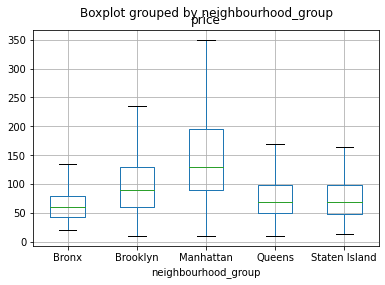

In [ ]:
bnb_df.boxplot(by='neighbourhood_group',column='price',grid=True)

In [ ]:
# Shape Of Dataset
bnb_df.shape

(35329, 16)

In [ ]:
#------------------------------------------------------------------------------

#Let's Have A Look On Map. 🗺

In [ ]:
#creating a map
nyc=fl.Map(location=[40.730610,-73.935242],zoom_start=10)

In [ ]:
# new dataframe of locations of neighbourhood groups
locations=pd.DataFrame({'name':['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],'latitude':[40.837048,40.650002,40.754932, 40.742054,40.579021],'longitude':[-73.865433,-73.949997,-73.984016, -73.769417,-74.151535]})


In [ ]:
# adding markers of neighbourhood_groups to the maps
for row,col in locations.iterrows():
  fl.Marker(location=[col['latitude'],col['longitude']],popup=col['name'],tooltip='click to know name',icon=fl.Icon(color='black',icon_color="white",icon='tint',angle=2,prefix='fa')).add_to(nyc) 

In [ ]:
#lets plot the map
nyc

**So, the amalgamation of these 5 boroughs together form The New York City.**

#Neighbourhood Groups Having The No. Of Apartments 🏨

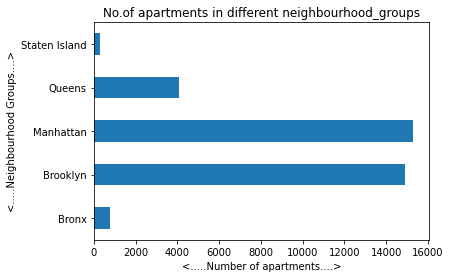

In [ ]:
bnb_df.groupby('neighbourhood_group')['name'].count().plot(kind='barh')
plt.title('No.of apartments in different neighbourhood_groups')
plt.ylabel('<.....Neighbourhood Groups....>')
plt.xlabel('<.....Number of apartments....>')
plt.show()

Ranking of Neighbourhood Groups having the highest number of apartments 🥇 
1. Manhattan
2. Brooklyn
3. Queens
4. Bronx
5. Staten Island

In [ ]:
#--------------------------------------------------------------------------

#Price Of Apartments Varying In Different Neighbourhood Groups 💸 💰

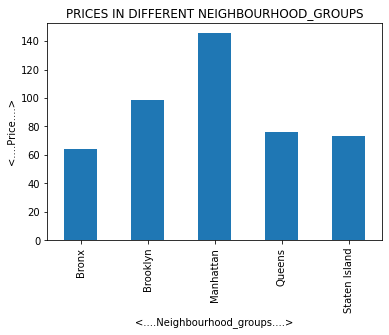

In [ ]:
bnb_df.groupby('neighbourhood_group')['price'].mean().plot.bar()
plt.title('PRICES IN DIFFERENT NEIGHBOURHOOD_GROUPS')
plt.xlabel('<....Neighbourhood_groups....>')
plt.ylabel('<....Price....>')
plt.show()

Ranking of Neighbourhood Groups having the highest price for apartments 🥇 
1. Manhattan
2. Brooklyn
3. Queens
4. Staten Island
5. Bronx

In [ ]:
#This Code of Line Is Used To Change The Length And Width Of The Plots, Charts and Graphs
plt.rcParams['figure.figsize'] = (10,5)